In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the data, split between train and validation sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# Preprocess (Categorically and one-hot encoding)
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [4]:
# Creating the Model 
model = Sequential()

model.add(Dense(units = 256, activation='sigmoid', input_dim=784))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

model.summary()
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics=['accuracy'])

# Show the model
plot_model(model, show_shapes=True, show_layer_names=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [5]:
# Train the model
history = model.fit(
    X_train,
    y_train, 
    epochs = 3,
    verbose = 1,
    batch_size = 32,
    validation_data=(X_valid, y_valid)
)

Epoch 1/3
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0744 - accuracy: 0.8801 - val_loss: 0.0481 - val_accuracy: 0.9171
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0430 - accuracy: 0.9298 - val_loss: 0.0410 - val_accuracy: 0.9291
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0364 - accuracy: 0.9401 - val_loss: 0.0373 - val_accuracy: 0.9363


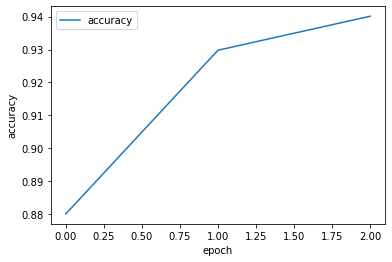

In [6]:
# Analysis the Accuracy result
plt.plot(history.history["accuracy"], label="accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

In [7]:
# Test Result
score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Loss: {0[0]}\nTesting Accuracy: {0[1]}".format(score))

Testing Loss: 0.03431571274995804
Testing Accuracy: 0.9422000050544739


1/1 [==============================] - 0s 81ms/step
[7 2 1 0 4 1 4 9 5 9]


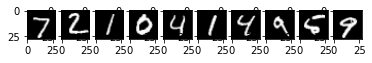

In [8]:
# Prediction of the model
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

In [13]:
# Optimize the model

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Normalization
X_train = X_train / 255
X_test = X_test / 255

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

def new_model(drop_rate=0.5, lr=0.1, bs=16, epo=10):
    global model
    model = Sequential()
    model.add(Dense(units = 256, activation='sigmoid', input_dim=784))
    model.add(Dense(units = 128, activation='relu'))

    # Dropout
    model.add(Dropout(rate=drop_rate))

    model.add(Dense(units = 10, activation='softmax'))

    model.compile(
    # Change the optimizer and learning rate
    optimizer = optimizers.SGD(learning_rate = lr),
    
    # Optimize the loss Function
    loss = 'categorical_crossentropy',
    metrics=['accuracy'])
    
    # Optimize the batch size and epoch
    model.fit(X_train, y_train, verbose=0, batch_size=bs, epochs=epo, validation_data=(X_valid, y_valid))

    score = model.evaluate(X_test, y_test, verbose=0)
    print("New Model:\nDrop rate: {0}\nLearning rate: {1}\nBatch size: {2}\nEpochs: {3}".format(drop_rate, lr, bs, epo))
    print("Testing Loss: {0[0]}\nTesting Accuracy: {0[1]}\n".format(score))

In [14]:
new_model(drop_rate=0.5, lr=1, bs=32, epo=5)
new_model(drop_rate=0.5, lr=0.1, bs=32, epo=5)
new_model(drop_rate=0.5, lr=0.01, bs=32, epo=5)

New Model:
Drop rate: 0.5
Learning rate: 1
Batch size: 32
Epochs: 5
Testing Loss: 2.307689666748047
Testing Accuracy: 0.10100000351667404

New Model:
Drop rate: 0.5
Learning rate: 0.1
Batch size: 32
Epochs: 5
Testing Loss: 0.16181179881095886
Testing Accuracy: 0.9503999948501587

New Model:
Drop rate: 0.5
Learning rate: 0.01
Batch size: 32
Epochs: 5
Testing Loss: 0.33832138776779175
Testing Accuracy: 0.9041000008583069



In [15]:
new_model(drop_rate=0.5, lr=0.1, bs=16, epo=5)
new_model(drop_rate=0.5, lr=0.1, bs=32, epo=5)
new_model(drop_rate=0.5, lr=0.1, bs=64, epo=5)

New Model:
Drop rate: 0.5
Learning rate: 0.1
Batch size: 16
Epochs: 5
Testing Loss: 0.11759544909000397
Testing Accuracy: 0.9639000296592712

New Model:
Drop rate: 0.5
Learning rate: 0.1
Batch size: 32
Epochs: 5
Testing Loss: 0.15778350830078125
Testing Accuracy: 0.9509000182151794

New Model:
Drop rate: 0.5
Learning rate: 0.1
Batch size: 64
Epochs: 5
Testing Loss: 0.2095573991537094
Testing Accuracy: 0.9358999729156494



In [16]:
new_model(drop_rate=0.5, lr=0.1, bs=16, epo=5)
new_model(drop_rate=0.5, lr=0.1, bs=16, epo=10)
new_model(drop_rate=0.5, lr=0.1, bs=16, epo=20)

New Model:
Drop rate: 0.5
Learning rate: 0.1
Batch size: 16
Epochs: 5
Testing Loss: 0.12169519066810608
Testing Accuracy: 0.9621000289916992

New Model:
Drop rate: 0.5
Learning rate: 0.1
Batch size: 16
Epochs: 10
Testing Loss: 0.08324840664863586
Testing Accuracy: 0.9742000102996826

New Model:
Drop rate: 0.5
Learning rate: 0.1
Batch size: 16
Epochs: 20
Testing Loss: 0.07935099303722382
Testing Accuracy: 0.9790999889373779



In [17]:
new_model(drop_rate=0.4, lr=0.1, bs=16, epo=20)
new_model(drop_rate=0.5, lr=0.1, bs=16, epo=20)
new_model(drop_rate=0.6, lr=0.1, bs=16, epo=20)

New Model:
Drop rate: 0.4
Learning rate: 0.1
Batch size: 16
Epochs: 20
Testing Loss: 0.07487761974334717
Testing Accuracy: 0.9796000123023987

New Model:
Drop rate: 0.5
Learning rate: 0.1
Batch size: 16
Epochs: 20
Testing Loss: 0.08480628579854965
Testing Accuracy: 0.9779000282287598

New Model:
Drop rate: 0.6
Learning rate: 0.1
Batch size: 16
Epochs: 20
Testing Loss: 0.07798400521278381
Testing Accuracy: 0.9796000123023987

